<a href="https://colab.research.google.com/github/Ardalan-gerami81/HW_ML/blob/main/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from various_obj_regulator_data import *

In [64]:
u_ , x_ = cp.Variable((m,T)), cp.Variable((n,T+1))
objectives = [(cp.Minimize(cp.sum_squares(u_)) , "a) $\\sum||u_t||_2^2$"),
             (cp.Minimize(cp.sum(cp.norm(u_,2,axis=0))) , "b) $\\sum||u_t||_2$"),
             (cp.Minimize(cp.max(cp.norm(u_,axis=0))) , "c) $\\max||u_t||_2$"),
             (cp.Minimize(cp.sum(cp.norm(u_,1,axis=0))) , "d) $\\sum||u_t||_1$")
             ]

In [65]:
def control(objectives):
  plt.figure(figsize=(17,5))
  for i,obj in enumerate(objectives):
    const = [np.all(x_[:, -1] == np.zeros(n))] + [np.all(x_[:, 0] == x_init)]
    for t in range(1, T+1):
      const.append(x_[:,t] == A@x_[:,t-1] + B@u_[:,t-1])
    prob = cp.Problem(obj[0],const)
    prob.solve()
    plt.subplot(2,4,i+1)
    plt.plot(u_.value.T)
    if i == 0:
      plt.ylabel("$u_t$")
    plt.grid()
    plt.subplot(2,4,i+5)
    plt.xlabel("t")
    plt.plot(np.linalg.norm(u_.value,axis=0),c="green",label="$||u||_2$")
    if i == 2:
      plt.ylim(ymax = .15,ymin=0)
    if i == 0:
      plt.ylabel("$||u_t||$")
  plt.grid()
  plt.tight_layout()
  plt.show()

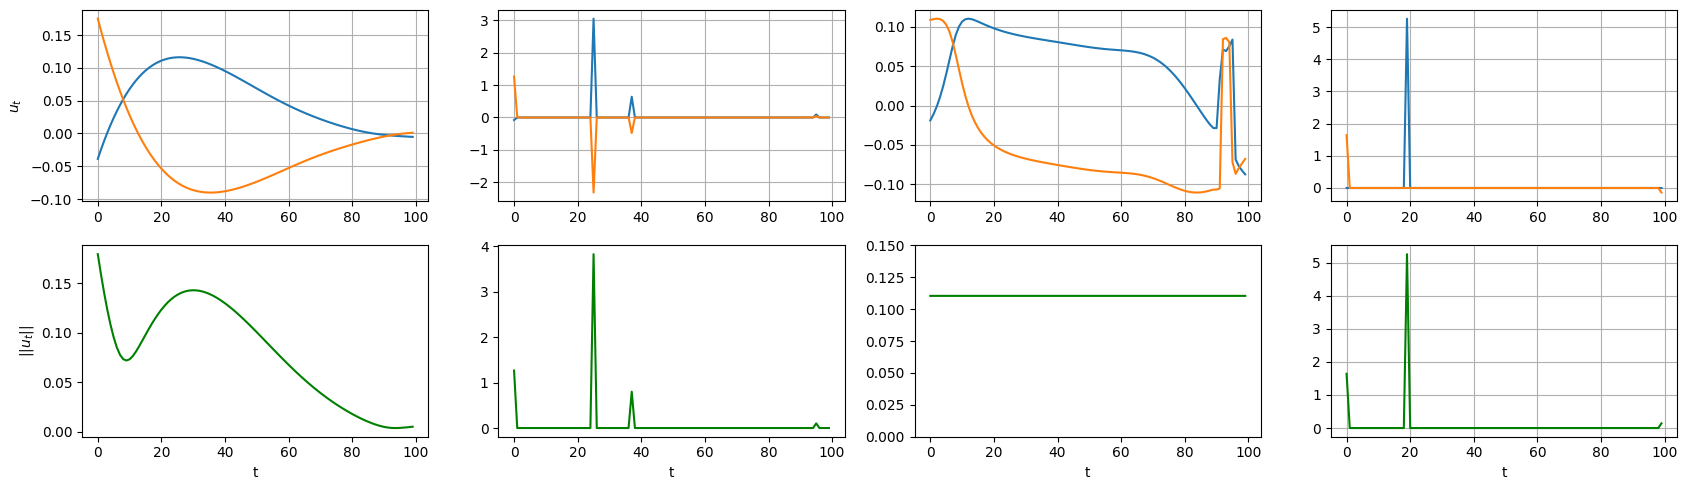

In [66]:
control(objectives)